In [1]:
import numpy as np


def additive_white_gaussian_noise_channel(
    x, n_rx=4, attenuation=0.95, noise_power=1e-5
):
    """
    Add AWGN to a signal

    Parameters:
    - x: Signal
    - n_rx: Number of receive antennas
    - attenuation: Channel attenuation
    - noise_power: Noise power

    Returns:
    - y: Signal with AWGN
    """

    w = np.sqrt(noise_power / 2) * (
        np.random.normal(0, 1, n_rx) + 1j * np.random.normal(0, 1, n_rx)
    )

    y = attenuation * x + w

    return y


def line_of_sight_simo_channel(
    x,
    n_rx=4,
    delta_r=0.5,
    distance=3,
    wavelength=0.1,
    phi=0.1,
    attenuation=0.95,
    noise_power=1e-5,
):
    """
    Simulate a line-of-sight SIMO channel

    Parameters:
    - x: Transmitted symbol
    - n_rx: Number of receive antennas
    - delta_r: Normalized receive antenna separation
    - distance: Distance from transmit antenna to the first receive antenna (in meters)
    - wavelength: Wavelength (in meters)
    - phi: Angle of incidence of the line-of-sight onto the receive antenna array
    - attenuation: Channel attenuation
    - noise_power: Noise power

    Returns:
    - y: Received symbol
    - h: Channel spatial signature

    Reference:
    - [1] Manikas, A. (2019). Modelling of SIMO, MISO, and MIMO Antenna Array. Lecture slides presented in EE401: Advanced Communication Theory at Imperial College London.

    """

    c = 3e8  # Speed of light

    # Calculate spatial signature
    omega = np.cos(phi)
    h = (
        attenuation
        * np.exp(-1j * 2 * np.pi * distance / wavelength)
        * np.exp(-1j * 2 * np.pi * np.arange(n_rx) * delta_r * omega)
    )

    w = np.sqrt(noise_power / 2) * (
        np.random.normal(0, 1, n_rx) + 1j * np.random.normal(0, 1, n_rx)
    )

    y = h * x + w

    return y, h


In [2]:
import numpy as np


def mrc_receiver(received_signal, channel_gains):
    """
    Maximum Ratio Combining (MRC) receiver

    Parameters:
    - received_signal: Received symbol vector
    - channel_gains: Channel gains vector

    Returns:
    - decoded_symbol: Decoded symbol
    """

    mrc_weights = (
        np.conj(channel_gains) / np.linalg.norm(channel_gains) / 2
    )  # MRC weights

    decoded_symbol = np.dot(mrc_weights, received_signal)

    return decoded_symbol


In [3]:
# Simulation parameters
n_rx = 4                # Number of receive antennas
delta_r = 0.5           # Normalized receive antenna separation (in wavelengths)
distance = 3            # Distance from transmit antenna to the first receive antenna (in meters)
phi = 0.1              # Angle of incidence of the line-of-sight onto the receive antenna array
fc = 2e9                # Carrier frequency (in Hertz)
c = 3e8                 # Speed of light (in meters per second)
wavelength = c / fc     # Wavelength (in meters)
attenuation = 0.95       # Channel attenuation
symbol = np.random.normal(0, 1) + 1j * np.random.normal(0, 1)  # Transmitted symbol
noise_power = 1e-5      # Noise power

# Simulate SIMO channel
y,h = line_of_sight_simo_channel(symbol, n_rx, delta_r, distance, wavelength, phi, attenuation, noise_power)

In [4]:
# Use the MRC receiver on the simulated SIMO channel
decoded_symbol = mrc_receiver(y, h)

# Print results
print("Transmitted Symbol:", symbol)
print("Received Symbol after MRC:", decoded_symbol)

Transmitted Symbol: (0.8726602061615796+0.021186989389398458j)
Received Symbol after MRC: (0.8284408422351071+0.022541528297661005j)


In [5]:
# Use the MRC receiver on the simulated SIMO channel
decoded_symbol = mrc_receiver(y, h)

# Print results
print("Transmitted Symbol:", symbol)
print("Received Symbol after MRC:", decoded_symbol)

Transmitted Symbol: (0.8726602061615796+0.021186989389398458j)
Received Symbol after MRC: (0.8284408422351071+0.022541528297661005j)


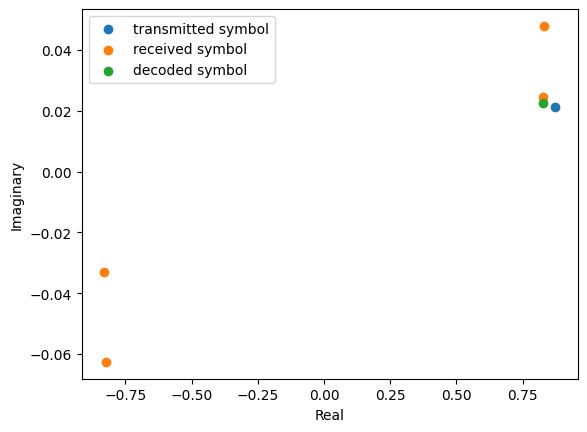

In [6]:
# Plot y and decoded_symbol on the complex plane
import matplotlib.pyplot as plt
plt.scatter(np.real(symbol), np.imag(symbol), label='transmitted symbol')
plt.scatter(np.real(y), np.imag(y), label='received symbol')
plt.scatter(np.real(decoded_symbol), np.imag(decoded_symbol), label='decoded symbol')
plt.legend()
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()